## CS 6120: Natural Language Processing - Prof. Ahmad Uzair

### Assignment 2: Text Classification and Neural Network
### Total Points: 100 points

In Assignment 2, you will be dealing with text classification using Multinomial Naive Bayes and Neural Networks. You will also be dealing with vector visualization. In the previous assingment you implemented Bag of Words as the feature selection method. However, in this assignment you will be using TF-IDF Vectorization instead of Bag of Words. We recommend starting with this assignment a little early as the datasets are quite large and several parts of the assignment might take long duration to execute. 

## Question 1 Text Classification

In the first question you will be dealing with AG News Dataset. You are required to implement TF-IDF vectorization from scratch and perform Multinomial Naive Bayes Classification on dataset.
You may use appropriate packages or modules for fitting the Multinomial Naive Bayes Model, however, the implementation of the TF-IDF Vectorization should be from the scratch.

In [1]:
#importing the libraries

import numpy as np
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups
from pprint import pprint
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import pandas as pd
import re
import numpy as np
from nltk.tokenize import  word_tokenize 
import nltk
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
import math
import string
import warnings

warnings.filterwarnings("ignore")
nltk.download('popular', quiet=True)

stopword = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

The ag news dataset comprises around 18000 news text in 4 categories.

In [3]:
# Read the csv file agnews.csv
mydata_train = pd.read_csv("agnews.csv")
mydata_train.head()

,Unnamed: 0,ClassIndex,Title,Description
0,73346,1,"""Greed and arrogance,"" made Rod Stewart keep c...",AFP - Raspy-voiced British Rock star Rod Stewa...
1,74277,1,Darfur families face food misery,A World Food Programme survey says almost half...
2,22299,1,Italy looks for Arab support to free hostages ...,ROME : A top Italian official leaves for the M...
3,35338,1,Air pollution causes five million deaths each ...,AFP - As many as five million deaths are cause...
4,68778,2,Fergie: Only A Win Will Do,Sir Alex Ferguson is convinced Manchester Unit...


In [4]:
# Print the news categories in the dataset
print(list(mydata_train.ClassIndex)[:10]) # Limiting to first 10 to avoid flooding the page

[1, 1, 1, 1, 2, 2, 1, 1, 3, 4]


In [5]:
# Preparing the output values y for later use
y = list(mydata_train.ClassIndex)
y[:10]

[1, 1, 1, 1, 2, 2, 1, 1, 3, 4]

In [6]:
# What is the type of 'mydata_train'
print(type(mydata_train))

<class 'pandas.core.frame.DataFrame'>


In [7]:
# Check the length of the data
print(len(mydata_train.ClassIndex))
print(len(mydata_train.Description))


18000
18000


### Expected Output: 
18000

18000


## Extracting Features from the Dataset                        (20 Points)

In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors.

### TF-IDF Vectorization

Our model cannot simply read the text data so we convert it into numerical format. In order to convert the data into numerical format we create vectors from text.

For this particular purpose we could either employ Bag of Words or TF-IDF Vectorization

Bag of Words just creates a set of vectors containing the count of word occurrences in the document (reviews), while the TF-IDF model contains information on the more important words and the less important ones as well.

TF-IDF stands for Term Frequency-Inverse Document Frequency, which instead of giving more weight to words that occur more frequently, it gives a higher weight to words that occur less frequently.

Ref: 6.5 TF-IDF: Weighing terms in the vector section of Dan Jurafsky book
https://web.stanford.edu/~jurafsky/slp3/6.pdf

TF-IDF = Term Frequency (TF) * Inverse Document Frequency (IDF)

Term Frequency is the measure of the frequency of words in a document. It is the ratio of the number of times the word appears in a document compared to the total number of words in that document.

The words that occur rarely in the corpus have a high IDF score. It is the log of the ratio of the number of documents to the number of documents containing the word.

idf(t) = log(N/(df + 1))

## Preprocessing the Corpus

In [8]:
text = mydata_train.Description

In [9]:
# Clean the text (I am recycling my function from Assignment 1, but modifying it slightly)

def clean_text(text):
    '''
    Input:
        review: a string containing a review.
    Output:
        review_cleaned: a processed review. 

    '''
    #Convert to string
    text_cleaned = str(text)
    
    # Convert lowercase
    text_cleaned = text_cleaned.lower()
    
    # Remove punctuation
    text_cleaned  = "".join([char for char in text_cleaned if char not in string.punctuation])
    
    # Remove stopwords
    text_cleaned = " ".join([word for word in re.split('\W+', text_cleaned) if word not in stopword])
        
    # Remove multiple spaces
    text_cleaned = re.sub(' +', ' ', text_cleaned)
    
    return text_cleaned


In [10]:
clean_text(text[123])

'opec 39s president taken unprecedented step urging united states tap emergency crude reserves bring world oil prices'

In [11]:
# List to hold the texts
text_clean = []

# Iterate over the texts and apply the cleaning script
for line in text:
    tmp_text = clean_text(line)
    text_clean.append(tmp_text)

In [12]:
# Checking to see an example of what the spit data will look like
text_clean[123].split(" ")

['opec',
 '39s',
 'president',
 'taken',
 'unprecedented',
 'step',
 'urging',
 'united',
 'states',
 'tap',
 'emergency',
 'crude',
 'reserves',
 'bring',
 'world',
 'oil',
 'prices']

In [13]:
# Preprocessing the data

text = text_clean

lines = [] 
word_list = [] 
 
for line in text:
    #tokenize the text documents and update the lists word_list and lines
    
    # Tokenizing use the split() function
    tokenized_text = line.split(" ")
    
    # Appending the result to the lines variable
    lines.append(tokenized_text)
    
    # Iterating over the words and adding them to the word list
    for word in tokenized_text:
        word_list.append(word)
    
# Make sure the word_list contains unique tokens
word_list = list(set(word_list))
print("word_list: ", len(word_list))

# Calculate the total documents present in the corpus
total_docs = len(lines)
print("total_docs: ", total_docs)
 
#Create a dictionary to keep track of index of each word
dict_idx = {k: v for v, k in enumerate(word_list)}

# Checking the total number of words in the dictionary
print("dict_idx: ", len(dict_idx))

word_list:  36859
total_docs:  18000
dict_idx:  36859


In [14]:
dict_idx["star"]

15149

In [15]:
# Checking the index of a word
dict_idx["psychiatrist"]

30481

In [16]:
# Checking the index of a word
dict_idx["british"]

27960

In [17]:
# Create a frequency dictionary
 
def frequency_dict(lines):
    '''
    lines: list containing all the tokens
    ---
    freq_word: returns a dictionary which keeps the count of the number of documents containing the given word
    '''
    # Create a dict to save results to
    freq_word = {}
    
    # Iterate over each line
    for line in lines:
        
        # Iterate over each word in each line
        for word in line:
            
            # Check if the word exists, and increment
            if word in freq_word:
                freq_word[word] += 1
            # If does not exist, set to 1
            else:
                freq_word[word] = 1 
                
    return freq_word

In [18]:
# Create a dictionary containing the frequency of words utilizing the 'frequency_dict' function

# Expect this chunk to take a comparatively longer time to execute since our dataset is large

freq_word = frequency_dict(lines)

In [19]:
# Checking some examples
freq_word["natural"]

37

In [20]:
# Checking some examples
freq_word["language"]

20

In [21]:
# Checking some examples
freq_word["processing"]

13

In [22]:
# Create a function to calculate the Term Frequency

def term_frequency(document, word):
    '''
    document: list containing the entire corpus
    word: word whose term frequency is to be calculated
    ---
    tf: returns term frequency value
    '''    
    # Calculate the word occurance in the given document
    wof = [i for i in document if i == word]

    # Calculate the TF by dividing the occurance by the len of document
    tf = len(wof) / len(document)
    
    return tf

In [23]:
term_frequency(["cat", "dog", "pig", "spider", "dog", "jaguar", "elephant"], "dog")

0.2857142857142857

In [24]:
# Create a function to calculate the Inverse Document Frequency
 
def inverse_df(word):
    '''
    word: word whose inverse document frequency is to be calculated
    ---
    idf: return inverse document frequency value
    '''
    # Implement try/except to account for bad words
    try:
        # Increment by 1
        wof = freq_word[word] + 1
    except:
        # Set as 1
        wof = 1
    
    # calculate the log of total docs / wof
    idf = np.log(total_docs/wof)
    
    return idf

In [25]:
# Check some example words
inverse_df("dog")

7.600902459542082

In [26]:
# Check some example words
inverse_df("asdasdasd")

9.798127036878302

In [27]:
# Check some example words
inverse_df("saleh")

9.104979856318357

In [28]:
# Check some example words
inverse_df("1")

4.382026634673881

In [29]:
#Create a function to combine the term frequencies (TF) and inverse document (IDF) frequencies calculated above to get TF-IDF

def tfidf(sentence, dict_idx):
    '''
    sentence: list containing the entire corpus
    dict: dictionary keeping track of index of each word
    ---
    tf_idf_vec: returns computed tf-idf
    '''
    
    # Generate a list of vectors of zero
    tf_idf_vec = [0]*len(word_list)
    
    # Iterate over each word in the sentence
    for word in sentence:
        # Calculate the term frequency
        tf_calc = term_frequency(sentence, word)
        # Calculate the inverse document frequency
        idf_calc = inverse_df(word)
        
        # Calculate tfidf
        tfidf = tf_calc*idf_calc
        
        # Check for negative values
        if tfidf < 0:
            
            # If negative, set to 0
            tf_idf_vec[dict_idx[word]] = np.absolute(tfidf)
        else:
            # Calculate TF*IDF
            tf_idf_vec[dict_idx[word]] = tfidf
#         tf_idf_vec[dict_idx[word]] = tfidf
        
    return tf_idf_vec

In [30]:
%%time

#Compute the vectors utilizing the 'tfidf' function created above to obtain a TF-IDF Encoded text corpus

# Create a list to save all document vectors
doc_vecs = []

# Iterate over each line in the lines variable
for line in lines:
    
    # Calculate the TFIDF for that line
    tmp_vec = tfidf(line, dict_idx)
    
    # Append the TFIDF vector to the doc_vecs list
    doc_vecs.append(tmp_vec)

Wall time: 5.32 s


In [ ]:
#min(min(x for x in doc_vecs))

In [31]:
# Print an example, but limit to non-zero values to not flood the page
print([i for i in doc_vecs[234] if i != 0])

[0.3186097961847109, 0.19920386415078833, 0.41137522530132314, 0.44215028215887364, 0.5675253613989899, 0.46593620021967236, 0.3804544482263847, 0.7016986813816788, 0.31911531606513793, 0.5155447865302919, 0.49012798087400444]


In [32]:
# Comparing against the sklearn tfidf vectorizer:

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text)
# X.toarray()[123]

print([i for i in X.toarray()[111] if i != 0])

[0.11053250026637006, 0.26241640995238363, 0.23482942427611583, 0.28948686601913765, 0.1779099286302907, 0.2864799389837823, 0.16824850968911984, 0.18263080898342277, 0.3146043490321735, 0.18953829345536513, 0.25047765895821306, 0.24456540995613427, 0.3231782042882095, 0.17232594853001268, 0.3001322821196077, 0.31271680186777995, 0.15850833043285825]


## Multinomial Naive Bayes (10 Points)

In [47]:
from sklearn.model_selection import train_test_split

# Split training and testing
X_train, X_test, y_train, y_test = train_test_split(doc_vecs, y, random_state=30, test_size=0.1)

In [48]:
print("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))


X_train:  16200
X_test:  1800
y_train:  16200
y_test:  1800


In [49]:
X_train[123][:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [50]:
y_train[123]

3

In [51]:
#Fit a Multinomial Naive Bayes Model on our dataset
from sklearn.naive_bayes import MultinomialNB

# Prepare a model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [52]:
#Perform testing on the train dataset

pred = model.predict(X_test)

In [58]:
#Calculate the F1 Score and the Accuracy

from sklearn.metrics import f1_score, accuracy_score

F1_score = f1_score(y_test, pred, average='macro')
Accuracy = accuracy_score(y_test, pred)

print("F1 Score: ", F1_score)
print("Accuracy: ", Accuracy)
print("Difference in score due to strong preprocessing (cleaning) above")

F1 Score:  0.8987174520246209
Accuracy:  0.8994444444444445
Difference in score due to strong preprocessing (cleaning) above


### Expected Output:
F1 Score: 0.9604092771164052

Accuracy: 0.9604444444444444


Your accuracy does not have to be exactly the same. This is just to give you an estimate of what could you expect your accuracy to be around.

In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          1       0.90      0.90      0.90       448
          2       0.94      0.98      0.96       456
          3       0.86      0.86      0.86       452
          4       0.89      0.85      0.87       444

avg / total       0.90      0.90      0.90      1800



## Question 2 Vector Visualization

In this unsupervised learning task we are going to cluster wikipedia articles into groups using T-SNE visualization after vectorization.

### Collect articles from Wikipedia (10 points)

In this section we will download articles from wikipedia and then vectorize them in the next step. You can select somewhat related topics or fetch the articles randomly. 
(Use dir() and help() functions or refer wikipedia documentation)
You may also pick any other data source of your choice instead of wikipedia.

In [60]:
# install libraries
!pip install wikipedia --quiet


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [209]:
import wikipedia
from wikipedia.exceptions import WikipediaException

'''
 Generate a list of wikipedia article to cluster 
 You can maintain a static list of titles or generate them randomly using wikipedia library
 Some topics include:
 ["Northeastern Unversity", "Natural language processing", "Machine learning", "Quantum machine learning", "Artificial intelligence", "Data science", "Master in Data Science", 
 "Bank of America", "Visa Inc.", "European Central Bank", "Bank", "Financial technology","International Monetary Fund", 
 "Basketball", "Swimming", "Tennis", "Football", "College Football", "Association Football"]

 You can add more topics from different categories so that we have a diverse dataset to work with. 
 Ex- About 3+ categories(groups), 3+ topics in each category, 3+ articles in each topic
'''

# selected topics
topics = ["Data science", "Natural Language Processing", "Deep Learning", "Bayes Theorem", "Statistics", "Algebra", "Artificial Intelligence", "Semantic Searching", "Lingustics", "Linear Regression", "Ensemble Learning", "Keras", "Python Language", "Supervised Learning", "Unsupervised Learning",
          "Saudi Arabia", "Dubai", "Oman", "Bahrain", "Jordan", "Afghanistan", "Egypt", "Pakistan", "Iraq", "Lebanon", "Syria", "Iran", "Algeria", "Morocco", "Tunisia",
          "Basketball", "Golf", "Football", "Hockey", "Volleyball", "Racketball", "Sports", "Skating", "Running", "Sking", "NFL", "Baseball", "Soccer", "Badminton", "Dodgeball"
         ]

# list of articles to be downloaded
articles = []
for idx, topic in enumerate(topics):
    article = wikipedia.search(topic)[0]
    print(f"Found {idx} - ", article)
    articles.append(article)
    
# articles = [item for sublist in articles for item in sublist]

# print(articles)

# download and store articles (summaries) in this variable
data = []
for article in articles:
#     print("Found: ", article)
    data.append(wikipedia.summary(article))


Found 0 -  Data science
Found 1 -  Natural language processing
Found 2 -  Deep learning
Found 3 -  Bayes' theorem
Found 4 -  Statistics
Found 5 -  Algebra
Found 6 -  Artificial intelligence
Found 7 -  Semantic search
Found 8 -  Linguistics
Found 9 -  Linear regression
Found 10 -  Ensemble learning
Found 11 -  Keras
Found 12 -  Python (programming language)
Found 13 -  Supervised learning
Found 14 -  Unsupervised learning
Found 15 -  Saudi Arabia
Found 16 -  Dubai
Found 17 -  Oman
Found 18 -  Bahrain
Found 19 -  Jordan
Found 20 -  Afghanistan
Found 21 -  Egypt
Found 22 -  Pakistan
Found 23 -  Iraq
Found 24 -  Lebanon
Found 25 -  Syria
Found 26 -  Iran
Found 27 -  Algeria
Found 28 -  Morocco
Found 29 -  Tunisia
Found 30 -  Basketball
Found 31 -  Golf
Found 32 -  Football
Found 33 -  Hockey
Found 34 -  Volleyball
Found 35 -  Racquetball
Found 36 -  Sport
Found 37 -  Skating
Found 38 -  Running
Found 39 -  Skiing
Found 40 -  National Football League
Found 41 -  Baseball
Found 42 -  Associa

In [231]:
y = ["Data Science"] * 15 + ["Countries"] * 15 + ["Sports"] * 15
y

['Data Science',
 'Data Science',
 'Data Science',
 'Data Science',
 'Data Science',
 'Data Science',
 'Data Science',
 'Data Science',
 'Data Science',
 'Data Science',
 'Data Science',
 'Data Science',
 'Data Science',
 'Data Science',
 'Data Science',
 'Countries',
 'Countries',
 'Countries',
 'Countries',
 'Countries',
 'Countries',
 'Countries',
 'Countries',
 'Countries',
 'Countries',
 'Countries',
 'Countries',
 'Countries',
 'Countries',
 'Countries',
 'Sports',
 'Sports',
 'Sports',
 'Sports',
 'Sports',
 'Sports',
 'Sports',
 'Sports',
 'Sports',
 'Sports',
 'Sports',
 'Sports',
 'Sports',
 'Sports',
 'Sports']

In [213]:
print("Total Articles: ", len(data))
print(data[14])

Total Articles:  45
Supervised learning (SL) is a machine learning paradigm for problems where the available data consists of labelled examples, meaning that each data point contains features (covariates) and an associated label. The goal of supervised learning algorithms is learning a function that maps feature vectors (inputs) to labels (output), based on example input-output pairs. It infers a function from labeled training data consisting of a set of training examples. In supervised learning, each example is a pair consisting of an input object (typically a vector) and a desired output value (also called the supervisory signal). A supervised learning algorithm analyzes the training data and produces an inferred function, which can be used for mapping new examples. An optimal scenario will allow for the algorithm to correctly determine the class labels for unseen instances. This requires the learning algorithm to generalize from the training data to unseen situations in a "reasonabl

### Cleaning the Data (5 points)
In this step you will decide whether to clean the data or not. If you choose to clean, you may utilize the clean function from assignment 1.

**Question:** Why are you (not) choosing to clean the data? Think in terms of whether cleaning data will help in the clustering or not.

**Answer(1-3 sentences):** 

- The main idea behind clustering is to **group texts together based on similarity**, so that texts that have more in common are more likely to be clustered together, and therefore are more similar
- We **clean** the texts to make sure that similarity is calculated using 'important' features (words like 'germany', 'india', soccer'), and NOT words like "and", or "the".
- We **clean the texts the same way to remain consistent**, so that we can obtain the **best results possible**; in the code below, we will change the case to lower, remove punctuation, remove stop words, and then remove multiple (2 or more) spaces

In [214]:
# You can use Assignment 1's clean message function
import re
import nltk
import string
#nltk.download('punkt')
#nltk.download('stopwords')

def clean_message(message):
    '''
    Input:
        review: a string containing a message.
    Output:
        review_cleaned: a processed message. 

    '''
    #Convert to string
    message = str(message)
    
    # Convert lowercase
    message = message.lower()
    
    # Remove punctuation
    message  = "".join([char for char in message if char not in string.punctuation])
    
    # Remove stopwords
    message = " ".join([word for word in re.split('\W+', message) if word not in stopword])
        
    # Remove multiple spaces
    message = re.sub(' +', ' ', message)
    
    return message


In [217]:
clean_message(data[13])

'supervised learning sl machine learning paradigm problems available data consists labelled examples meaning data point contains features covariates associated label goal supervised learning algorithms learning function maps feature vectors inputs labels output based example inputoutput pairs infers function labeled training data consisting set training examples supervised learning example pair consisting input object typically vector desired output value also called supervisory signal supervised learning algorithm analyzes training data produces inferred function used mapping new examples optimal scenario allow algorithm correctly determine class labels unseen instances requires learning algorithm generalize training data unseen situations reasonable way see inductive bias statistical quality algorithm measured socalled generalization error'

### Vectorize the articles (5 points)

In this step, we will vectorize the text data. You can use TfidfVectorizer() or countVectorizer() from sklearn library.

In [218]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Calling TfidfVectorizer
vectorizer = TfidfVectorizer()

#Fitting and transforming the data we collected
X = vectorizer.fit_transform(data)

In [224]:
print(X.shape)

(45, 3753)


### Sample Output:
(36, 1552)

### Plot Articles (10 points)
Now we will try to verify the groups of articles using T-SNE from sklearn library.

In [228]:
 from sklearn.manifold import TSNE

# call TSNE() to fit the data
X_embedded = TSNE(n_components=2).fit_transform(X.toarray())

# Printing the shape
print(X_embedded.shape)

(45, 2)


In [243]:
# Converting to Dataframe for easier manipulation
articles_df = pd.DataFrame(X_embedded, columns=["TSNE1", "TSNE2"])
articles_df["Category"] = y
articles_df["Label" ] = topics
articles_df.head()

,TSNE1,TSNE2,Category,Label
0,-46.271049,-14.064435,Data Science,Data science
1,-46.036804,4.877841,Data Science,Natural Language Processing
2,-54.495945,-32.287373,Data Science,Deep Learning
3,-26.542200,9.229443,Data Science,Bayes Theorem
4,34.438175,-9.573137,Data Science,Statistics


Plot and annotate the points with different markers for different expected groups.

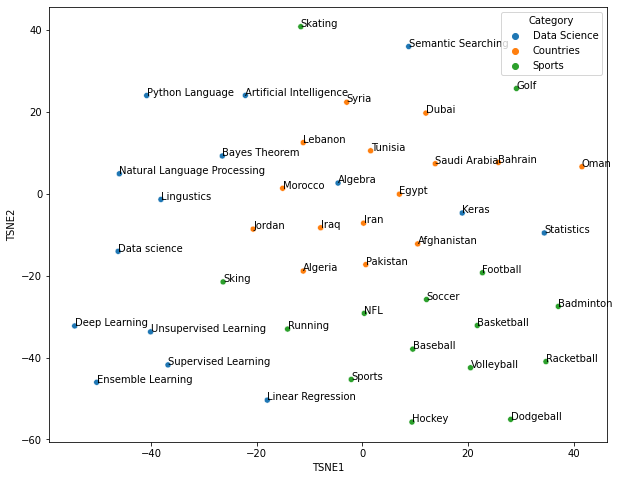

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns

# get a figure handle
fig,ax = plt.subplots(figsize=(10,8))

# Setting the two
x = articles_df["TSNE1"]
y = articles_df["TSNE2"]

# Plot scatter plot
sns.scatterplot(data=articles_df, x="TSNE1", y="TSNE2", hue="Category")

# Label the scatter plot via 'annotate'
for i, txt in enumerate(articles_df["Label"]):
    ax.annotate(txt, (x[i], y[i]))

<AxesSubplot:title={'center':'Figure Showing the KDE Plot'}, xlabel='TSNE1', ylabel='TSNE2'>

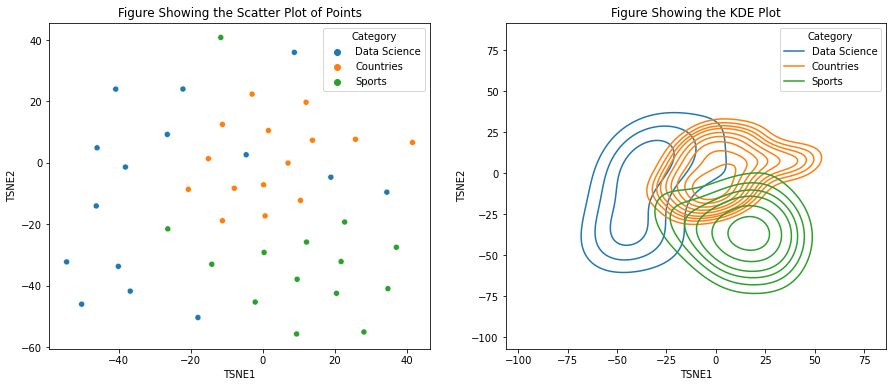

In [268]:
# Set the figure
fig,ax = plt.subplots(figsize=(15,6))

# Set a subplot and plot the scatter plot
plt.subplot(1, 2, 1)
plt.title("Figure Showing the Scatter Plot of Points")
sns.scatterplot(data=articles_df, x="TSNE1", y="TSNE2", hue="Category")

# Set a subplot and plot the KDE plot
plt.subplot(1, 2, 2)
plt.title("Figure Showing the KDE Plot")
sns.kdeplot(data=articles_df, x="TSNE1", y="TSNE2", hue="Category", thresh=0.2)


**Question:** Comment about the categorizion done by T-SNE. Do the articles of related topics cluster together? (5 points)

**Answer(1-3 sentences):**  
  


- Overall, the clusters have some **decent separation** to them for sure since we can see the **blue mostly on the left, the orange mostly at the top, and the green mostly on the bottom-right**.
- There are a **few outliers in the data** which caused some overlap between the clusters, and this is likely due to similarity in some of the words
- Overall the **clustering in my opinion looks good**, and a next potential step here is to refine the text some more to avoid overlap

# Question 3. Building Multinomial Naive Bayes and Neural Networks on Countvectors

### We are gonna use Disaster Tweets Datasset for this task. We need to Predict which Tweets are about real disasters and which ones are not.

### We are providing data.csv file along with this notebook. 

### Library Imports and Utility functions

In [2]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string
import pandas as pd
import re
#string.punctuation
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('words')

stopword = nltk.corpus.stopwords.words('english')
wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()
words = set(nltk.corpus.words.words())


def clean_text(text):
  # From the last assignment
    text = text.lower()
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www.\S+", "", text)
    text_links_removed = "".join([char for char in text if char not in string.punctuation])
    text_cleaned = " ".join([word for word in re.split('\W+', text_links_removed)
        if word not in stopword])
    text = " ".join([wn.lemmatize(word) for word in re.split('\W+', text_cleaned)])
    return text

[nltk_data] Downloading package stopwords to C:\Users\Saleh
[nltk_data]     Alkhalifa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Saleh
[nltk_data]     Alkhalifa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to C:\Users\Saleh
[nltk_data]     Alkhalifa\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


### Q) Importing the datasets and do the necessary cleaning and convert the text into the vectors which are mentioned in the below code blocks. (10 points)

In [3]:
# Import the data.csv only use 'text' and 'target' columns

# data
df = pd.read_csv("data-1.csv", usecols = ["text", "target"])

# expected shape of dataset is (7613, 2)
df.shape

(7613, 2)

In [4]:
# clean the text in the dataframe using the clean_text function provided above
df["text_clean"] = df["text"].apply(clean_text)

In [5]:
df.head()

,text,target,text_clean
0,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u
1,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...
3,"13,000 people receive #wildfires evacuation or...",1,13000 people receive wildfire evacuation order...
4,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...


In [6]:
# initialise count vectorizer from sklearn module with default parameter
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

# fit and transform on dataset
X = vectorizer.fit_transform(df["text_clean"]).toarray()

In [7]:
# get the values of target column

y = df["target"].values

In [8]:
# and printout the train.shape and validation.shape 

# X_train, X_test, y_train, y_test = train_test_split(X, y)

# print(X_train.shape)
# print(X_test.shape)

### Q) Build the neural networks using tensorflow keras by following the below instructions. Evaluate the model on different metrics and comment your observations. (15 points)

In [9]:
import tensorflow as tf

tf.random.set_seed(42)


# complete this linear model in tensorflow
def build_model(X):

    # layer 1 : input layer
    inp = tf.keras.Input((X.shape[1],))

    # layer 2 : add the dense layer with 64 units and relu activation
    x = tf.keras.layers.Dense(64, input_dim = X.shape[1] , activation = 'relu')(inp)

    # layer 3 : add the dropout layer with dropout rate of 0.5
    x = tf.keras.layers.Dropout(0.5)(x)

    # layer 4 : add the dense layer with 32 units with tanh activation and with l2 regularization
    x = tf.keras.layers.Dense(32, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)

    # layer 5 : add the dropout layer with dropout rate of 0.5
    x = tf.keras.layers.Dropout(0.5)(x)

    # layer 6 : add the dense layer with 16 units with tanh activation and with l2 regularization
    x = tf.keras.layers.Dense(16, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)

    # layer 7 : add the dropout layer with dropout rate of 0.5
    x = tf.keras.layers.Dropout(0.5)(x)

    # layer 8 : output layer with units equal to 1 and activation as sigmoid
    out = tf.keras.layers.Dense(1, activation='sigmoid')(x)

    # use loss as binary crossentropy, optimizer as rmsprop and evaluate model on auc 
    model = tf.keras.Model(inputs=inp, outputs=out)
    
    # Set AUC metric
    auc = tf.keras.metrics.AUC(name="auc")
    
    # Compile the model
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=[auc])

    return model


############## Fold 1/5 #################
Epoch 1/30
381/381 [==============================] - 6s 13ms/step - loss: 0.8018 - auc: 0.7335 - val_loss: 0.6627 - val_auc: 0.7247
Epoch 2/30
381/381 [==============================] - 5s 13ms/step - loss: 0.4914 - auc: 0.8747 - val_loss: 0.6435 - val_auc: 0.7296
Epoch 3/30
381/381 [==============================] - 5s 13ms/step - loss: 0.4219 - auc: 0.9016 - val_loss: 0.6336 - val_auc: 0.7361
Epoch 4/30
381/381 [==============================] - 5s 13ms/step - loss: 0.3943 - auc: 0.9127 - val_loss: 0.6359 - val_auc: 0.7368
Epoch 5/30
381/381 [==============================] - 5s 13ms/step - loss: 0.3780 - auc: 0.9174 - val_loss: 0.6248 - val_auc: 0.7370
Epoch 6/30
381/381 [==============================] - 5s 13ms/step - loss: 0.3621 - auc: 0.9230 - val_loss: 0.6273 - val_auc: 0.7414
Epoch 7/30
381/381 [==============================] - 5s 13ms/step - loss: 0.3505 - auc: 0.9270 - val_loss: 0.6393 - val_auc: 0.7414
Epoch 8/30
381/381 [=======

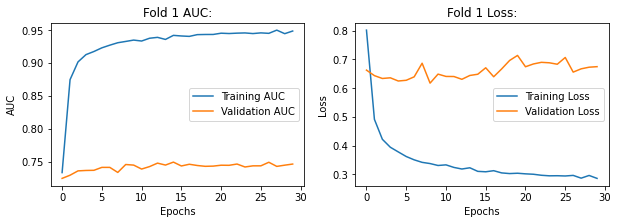

############## Fold 2/5 #################
Epoch 1/30
381/381 [==============================] - 7s 14ms/step - loss: 0.7704 - auc: 0.7529 - val_loss: 0.6674 - val_auc: 0.7129
Epoch 2/30
381/381 [==============================] - 5s 14ms/step - loss: 0.4694 - auc: 0.8871 - val_loss: 0.6882 - val_auc: 0.7100
Epoch 3/30
381/381 [==============================] - 5s 14ms/step - loss: 0.4078 - auc: 0.9089 - val_loss: 0.7048 - val_auc: 0.7117
Epoch 4/30
381/381 [==============================] - 5s 14ms/step - loss: 0.3802 - auc: 0.9189 - val_loss: 0.7291 - val_auc: 0.7047
Epoch 5/30
381/381 [==============================] - 5s 14ms/step - loss: 0.3558 - auc: 0.9272 - val_loss: 0.7310 - val_auc: 0.7035
Epoch 6/30
381/381 [==============================] - 5s 14ms/step - loss: 0.3405 - auc: 0.9338 - val_loss: 0.7277 - val_auc: 0.7016
Epoch 7/30
381/381 [==============================] - 6s 15ms/step - loss: 0.3347 - auc: 0.9336 - val_loss: 0.8100 - val_auc: 0.6996
Epoch 8/30
381/381 [=======

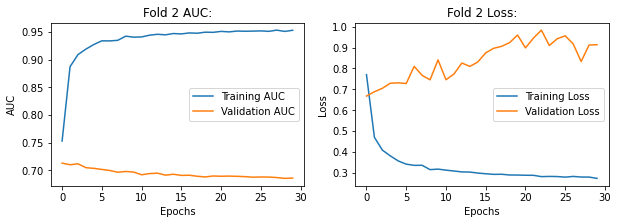

############## Fold 3/5 #################
Epoch 1/30
381/381 [==============================] - 6s 14ms/step - loss: 0.7761 - auc: 0.7491 - val_loss: 0.6481 - val_auc: 0.7539
Epoch 2/30
381/381 [==============================] - 5s 13ms/step - loss: 0.4760 - auc: 0.8817 - val_loss: 0.6330 - val_auc: 0.7576
Epoch 3/30
381/381 [==============================] - 5s 13ms/step - loss: 0.4107 - auc: 0.9063 - val_loss: 0.6703 - val_auc: 0.7606
Epoch 4/30
381/381 [==============================] - 5s 14ms/step - loss: 0.3823 - auc: 0.9156 - val_loss: 0.6716 - val_auc: 0.7608
Epoch 5/30
381/381 [==============================] - 5s 13ms/step - loss: 0.3596 - auc: 0.9235 - val_loss: 0.6688 - val_auc: 0.7619
Epoch 6/30
381/381 [==============================] - 5s 13ms/step - loss: 0.3473 - auc: 0.9289 - val_loss: 0.6599 - val_auc: 0.7612
Epoch 7/30
381/381 [==============================] - 5s 14ms/step - loss: 0.3431 - auc: 0.9290 - val_loss: 0.6726 - val_auc: 0.7620
Epoch 8/30
381/381 [=======

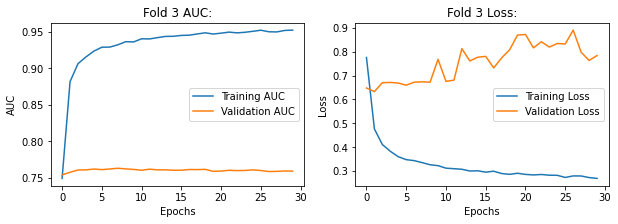

############## Fold 4/5 #################
Epoch 1/30
381/381 [==============================] - 6s 14ms/step - loss: 0.7840 - auc: 0.7524 - val_loss: 0.6670 - val_auc: 0.7283
Epoch 2/30
381/381 [==============================] - 5s 13ms/step - loss: 0.4830 - auc: 0.8812 - val_loss: 0.6647 - val_auc: 0.7330
Epoch 3/30
381/381 [==============================] - 5s 13ms/step - loss: 0.4163 - auc: 0.9076 - val_loss: 0.6589 - val_auc: 0.7313
Epoch 4/30
381/381 [==============================] - 5s 13ms/step - loss: 0.3885 - auc: 0.9178 - val_loss: 0.6555 - val_auc: 0.7319
Epoch 5/30
381/381 [==============================] - 5s 13ms/step - loss: 0.3657 - auc: 0.9248 - val_loss: 0.6840 - val_auc: 0.7319
Epoch 6/30
381/381 [==============================] - 5s 13ms/step - loss: 0.3533 - auc: 0.9283 - val_loss: 0.6785 - val_auc: 0.7322
Epoch 7/30
381/381 [==============================] - 5s 13ms/step - loss: 0.3405 - auc: 0.9336 - val_loss: 0.6859 - val_auc: 0.7318
Epoch 8/30
381/381 [=======

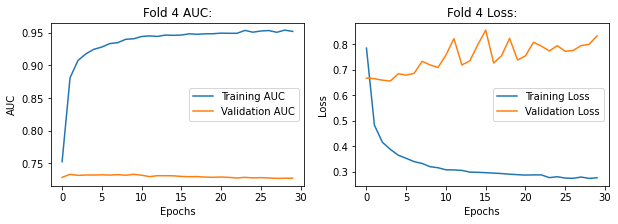

############## Fold 5/5 #################
Epoch 1/30
381/381 [==============================] - 7s 15ms/step - loss: 0.7879 - auc: 0.7050 - val_loss: 0.5693 - val_auc: 0.8428
Epoch 2/30
381/381 [==============================] - 5s 14ms/step - loss: 0.5067 - auc: 0.8659 - val_loss: 0.5070 - val_auc: 0.8522
Epoch 3/30
381/381 [==============================] - 5s 13ms/step - loss: 0.4389 - auc: 0.8971 - val_loss: 0.5106 - val_auc: 0.8550
Epoch 4/30
381/381 [==============================] - 5s 14ms/step - loss: 0.4115 - auc: 0.9068 - val_loss: 0.5011 - val_auc: 0.8563
Epoch 5/30
381/381 [==============================] - 5s 14ms/step - loss: 0.3871 - auc: 0.9152 - val_loss: 0.5135 - val_auc: 0.8561
Epoch 6/30
381/381 [==============================] - 6s 15ms/step - loss: 0.3740 - auc: 0.9208 - val_loss: 0.5017 - val_auc: 0.8546
Epoch 7/30
381/381 [==============================] - 6s 15ms/step - loss: 0.3631 - auc: 0.9245 - val_loss: 0.4971 - val_auc: 0.8541
Epoch 8/30
381/381 [=======

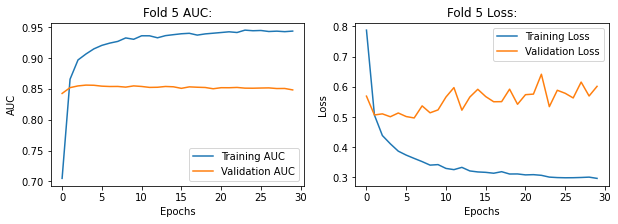

In [34]:
# Now we will initialise the stratified K-Fold from sklearn with nsplits as 5
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt

# Set the SFK class with 5 splits
skf = StratifiedKFold(n_splits=5)

# Now Split the countvectors and target (y)
splits = skf.split(X, y)

# iterate through the train and valid index in splits for 5 folds
for fold, (train_index, valid_index) in enumerate(splits):

    print(f"############## Fold {fold+1}/5 #################")
    
    # Get X_train, X_valid, y_train, y_valid using indexes
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    #call the build_model function and initialize the model
    model = build_model(X_train)
#     print(model.summary())

    # train and validate the model on the count vectors of text which we have created initially for 5 epochs, 
    # adjust batch size according to your computation power (suggestion use : 16)

    history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_valid, y_valid), verbose=1)

    # plot the graph between training auc and validation auc
    plt.figure(figsize=(10,3))

    # Plot subplot 1 with AUC
    plt.subplot(1, 2, 1)
    plt.title("Fold " + str(fold + 1) + " AUC:")
    plt.plot(history.history['auc'], label = 'Training AUC')
    plt.plot(history.history['val_auc'], label = 'Validation AUC')
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("AUC")

    # Plot subplot 2 with Loss
    plt.subplot(1, 2, 2)
    plt.title("Fold " + str(fold + 1) + " Loss:")
    plt.plot(history.history['loss'], label = 'Training Loss')
    plt.plot(history.history['val_loss'], label = 'Validation Loss')
    plt.legend()
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()


In [77]:
from sklearn.metrics import classification_report

y_pred = (model.predict(X_valid) > 0.80).astype("int32").ravel()

print(classification_report(y_pred, y_valid))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       936
           1       0.71      0.80      0.75       586

    accuracy                           0.80      1522
   macro avg       0.79      0.80      0.79      1522
weighted avg       0.81      0.80      0.80      1522



In [78]:
from sklearn.metrics import classification_report

y_pred = (model.predict(X) > 0.80).astype("int32").ravel()

print(classification_report(y_pred, y))

              precision    recall  f1-score   support

           0       0.96      0.84      0.90      4922
           1       0.76      0.93      0.84      2691

    accuracy                           0.87      7613
   macro avg       0.86      0.89      0.87      7613
weighted avg       0.89      0.87      0.88      7613



In [79]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_pred, y))

[[4148  774]
 [ 194 2497]]


- We can see from the results above that in the last fold, we achieved an ***AUC of around 85%***
- Upon evaluating the results futher using the classification_report, we can see a macro average of a the **precision** of around 79%, a **recall** of 80% a macro **F1** of 79%, with an overall **accuracy** of 80%.
- Looking at the dataset as a while, we can see higher metrics (unsurprisingly), with a total **accuracy of 87%** and roughly equal precision, recall and F1 scores.
- We can also see the performance of the model using the ***confusion matrix*** listed above showing the TP and TN values being superior to their counterparts. Please note that this was conducted on the dataset as a whole.
- We can see that while the model is able to generalize well on the data, some **improvements to the architecture**, or training parameters will be needed to improve the scores (I kept the model and params exactly as instructed)

### Q) Comment on the plots. How did it varied across different folds for neural networks?

- KFold is a form of cross validation (statistical method) to help estimate the **generalizability** of a machine learning model
- When using kfolds, each fold generally contains an **equal number of observations** as each other
- Because each fold will contain inherently different data, the folds will **have an element of difference** between each other, since the data is different
- In the 5 folds above, we notice that the **training AUC and validation AUC** are roughly similar across each of the folds, with minor differences in the validation AUC as it fluctuates between ~0.75 and 0.85
- The Loss however fluctuates much more, ranging between **0.5-0.8** in each of the different folds.
- The loss indicates how well the model is generalizing on the data, and **we generally want to see the validation loss decrease with respect to epochs.**
- When the loss increases, this is generally a sign of the model "not learning well", and we can try to address this by **changing the architecture of the model** or the method in which the data was preprocessed.

# Building Multinomial Navie Bayes on Countvectors

In [354]:
# !pip show scikit-learn

Name: scikit-learn
Version: 0.22
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: 
Author-email: 
License: new BSD
Location: c:\users\saleh alkhalifa\anaconda3\lib\site-packages
Requires: joblib, numpy, scipy
Required-by: autokeras, bert-extractive-summarizer, bioinfokit, dash-bio, keras-tuner, lightgbm, pmdarima, pytorch-tabnet, sentence-transformers, shap, sklearn, umap-learn


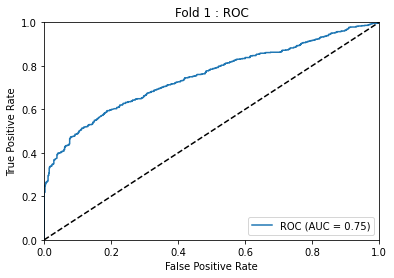

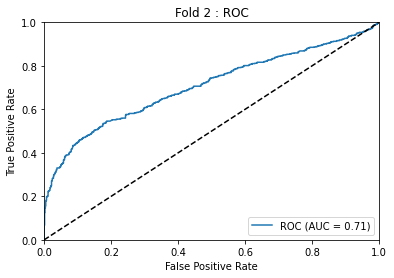

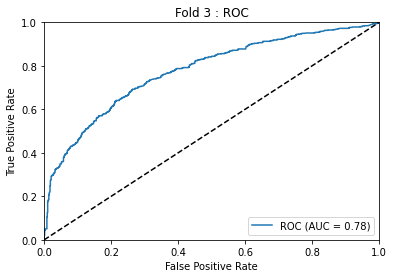

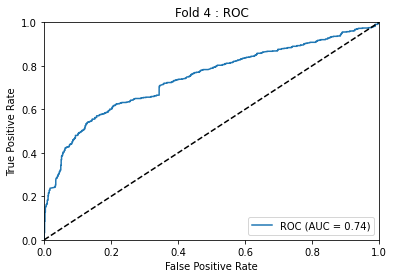

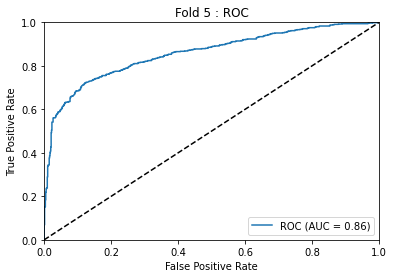

In [32]:
from sklearn import metrics

splits = skf.split(X, y)

# iterate through the train and valid index in splits for 5 folds. Use the splits created above.
for fold, (train_index, valid_index) in enumerate(splits):
    
#     print(f"###### Fold {fold} #######")
    
    # Get X_train, X_valid, y_train, y_valid using indexes
    X_train, X_valid = X[train_index], X[valid_index]
    y_train, y_valid = y[train_index], y[valid_index]

    # intialise multinomial navie bayes with default parameters
    model = MultinomialNB()
    
    # fit the data
    model.fit(X_train, y_train)
    
    # plot AUC-ROC curve for validation data
    # predict probabilities of the target variable
    proba = model.predict_proba(X_valid)
    
    # get the probabilities of the positive class only
    proba_positive = proba[:, 1]

    # calculate false positive rate, true positive rate, and probability thresholds
    fp, tp, thresholds = metrics.roc_curve(y_valid, proba_positive)

    # calculate area under the ROC curve
    roc_auc = metrics.auc(fp, tp)

    # plot the ROC curve
    plt.plot(fp, tp, label='ROC (AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Fold {fold+1} : ROC')
    plt.legend(loc="lower right")
    plt.show()

### Q) Comment on the plots. How did it varied across different folds for Multinomial Naive Bayes?

- Similar to the neural networks before, we **see some consistency** across each of the folds since the sample of data was roughly similar, however since the data included in each of the folds is inhently different we do **see some elements of dissimilarity** across them
- We can for example that **Fold 4 was more different than the other folds since the FP rate changed with respect to the TP rate**.
- However, we can see that fold 5 had **improved results** relative to the other folds given the larger area under the curve AUC.
- We can likely improve the model slightly by configuring and **optimizing some of the hyperparameters** in the model instead of using the standard params.
- All in all, we can see that the areas do **fluctuate and change** across each of the folds, which makes sense since the data we are using in each of the folds are **different samples** from the same population. 

## Question 4 Theory Question  

What is the difference between Count Vectorizer, TFIDF, Word2Vec and Glove? (5 points)

**Answer:**

- Each of these items comprise **different methods of preprocessing and representing raw text** to be used down the line by a machine learning model.
- **Count Vectorizer** is a method by which words in a sentence are tokenized and counted, giving the user a full list of words and the number of times each word occured within a given corpus.
- **TFIDF** takes the Count Vectorizer a step further by Normalizing the data. This is done by multiplying the number of times a word appears in a document, by the inverse document frequency of the word across the documents.
- **Word2Vec** is a method by which a neural network is used to learn the word associations within a given corpus. This improves on the previous two methods such that the association between words is now taken into account, to a certain extent.
- **GloVe** is a method catered to distributed word representations in which vetor representations are obtained in which the distance between words is understood as semantic similarity between them.

What is the significant difference between the Niave Bayes Implementation using Bag of Words and TF-IDF? (5 points)

**Answer:**

- The **Bag of Words** model is a method to represent raw text in the form of word frequencies, such that the raw text is tokenized, and each word is **counted**. Importance of the words in this model is based strictly on the frequency of word, which can be problematic when words like "and" or "computer" have the same frequency.
- **TFIDF** on the other hand can take into account another important factor: relative importance. The method multiplies and term frequency **(TF)** by the inverse of the document frequency **(IDF)**. Using this method, a words importance is not strictly based on its frequency, allowing use to give the words better representation. 
- The **significant difference** between the two is that BOW model represents the text via count, whereas TFIDF improves on this by reducing the impact of common words relative to the documents, providing a more optimal representation.